![SNOWFALL](Logo.webp)


# Proyecto Data Science - Modelos de Clasificación
#### Alumno: Diego Lozano Godos

## Caso: Riesgo Crediticio

Grupo de crédito hipotecario

Home Credit se esfuerza por ampliar la inclusión financiera de la población no bancarizada al brindar una experiencia de préstamo positiva y segura. Para asegurarse de que esta población desatendida tenga una experiencia crediticia positiva, Home Credit utiliza una variedad de datos alternativos, incluida la información de telecomunicaciones y transaccionales, para predecir la capacidad de pago de sus clientes.

Si bien Home Credit actualmente usa varios métodos estadísticos y de aprendizaje automático para hacer estas predicciones, el equipo se está desafiando desbloquear todo el potencial de los datos. De lograrse, garantizará que no se rechace a los clientes capaces de pagar y que los préstamos se otorguen con un capital, un vencimiento y un calendario de reembolso que permitan a sus clientes tener éxito.

La problematica en este caso, es determinar si al brindar un prestamo a un cliente, este cumplira con el pago de las cuotas o no.


Objetivo Principal:

 - Ajustar un modelo de clafisicación, para estimar si cliente tendra difcultades para ejecutar pago de un restamo o caso contrario

Objetivos Secundarios:

 - Identificar las principales variables que afectan a la variable dependiente (TARGET)
 - Ientificar cuales son los principales medios por los cuales se otorgan los prestamos
 - Identificar el ingreso promedio de los clientes tanto que generan riesgo como los que no.

In [1]:
! pip install sklearn

#### Descripción de las variables

A continuación se muestra la descripción de las primeras 15 variables

In [2]:
import pandas as pd
import numpy as np
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
import gc

from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>")) 

import warnings
warnings.simplefilter('ignore', UserWarning)

import gc
gc.enable()
    
    
    
df_desc= pd.read_csv("./risk/HomeCredit_columns_description_I.csv",sep=";",error_bad_lines=False)
df_desc.head(15)

,Order,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


#### Cargando las Datas

In [3]:
#Train 
df_train = pd.read_csv("./risk/application_train.csv")
#Test
df_test = pd.read_csv("./risk/application_test.csv")

df_bureau = pd.read_csv("./risk/bureau.csv")
bureau_balance = pd.read_csv('./risk/bureau_balance.csv')
df_previous_application = pd.read_csv("./risk/previous_application.csv")

In [4]:
print(f" Dimensión de Train data = {df_train.shape}")
print(f" Dimensión de bureau data = {df_bureau.shape}")
print(f" Dimensión de bureau_balance data = {bureau_balance.shape}")
print(f" Dimensión de previous_application data = {df_previous_application.shape}")
print(f" Dimensión de Test data = {df_test.shape}")

 Dimensión de Train data = (307511, 122)
 Dimensión de bureau data = (1716428, 17)
 Dimensión de bureau_balance data = (27299925, 3)
 Dimensión de previous_application data = (1670214, 37)
 Dimensión de Test data = (48744, 121)


In [5]:
df_train["SK_ID_CURR"].nunique()

307511

In [6]:
print(f" Valores unicos en Train data = {df_train.SK_ID_CURR.nunique()}")
print(f" Valores unicos en bureau data = {df_bureau.SK_ID_CURR.nunique()}")
print(f" Valores unicos en previous_application data = {df_previous_application.SK_ID_CURR.nunique()}")

 Valores unicos en Train data = 307511
 Valores unicos en bureau data = 305811
 Valores unicos en previous_application data = 338857


### Análisis exploratorio de datos (EDA)

Parte de la competencia fue incorporar todos los datos que pudieran ser relevantes para influir en la predictibilidad del modelo. La compañía proporcionó tres fuentes de datos diferentes que podrían influir en si una persona incumpliría con su préstamo:

 - Train|Test de datos de prueba que incluía el préstamo y el solicitante del préstamo en el momento de la solicitud
 - Aplication Data - Datos de solicitudes de préstamos anteriores que los clientes obtuvieron de otras instituciones y se informaron a la Oficina de Crédito. Datos de solicitud de préstamos anteriores del cliente en Home Credit e información sobre los parámetros del préstamo anterior e información del cliente en el momento de la solicitud anterior

 Esta sección desglosará el proceso y las tareas que cada miembro del equipo tomó para completar el EDA en estos conjuntos de datos.
 
 Para una mirada más profunda a las funciones que se usaron en el modelo final, siga los enlaces al cuaderno correspondiente ubicado en la sección Recursos adicionales.

En primer lugar, se procedió a realizar la identificacion de valores perdidos

#### Distribución de la Target

Target Distribution
0    282686
1     24825
Name: TARGET, dtype: int64



<AxesSubplot: xlabel='TARGET', ylabel='count'>

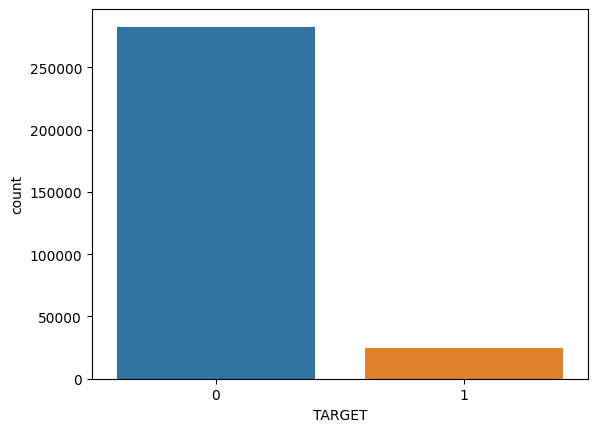

In [7]:
print("Target Distribution")
print(df_train['TARGET'].value_counts())
print("")
sns.countplot(x='TARGET', data=df_train)

#### Distribución de la Edad

In [8]:
# Información sobre la edad en un marco de datos separado
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
age_df = df_train[['TARGET', 'DAYS_BIRTH']]
age_df['YEARS_BIRTH'] = age_df['DAYS_BIRTH']/ 365

# Construyendo intervalos
age_df['YEARS_BINNED'] = pd.cut(age_df['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_df.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [9]:
# Agrupar por Intervalo y calcular promedios
age_groups = age_df.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


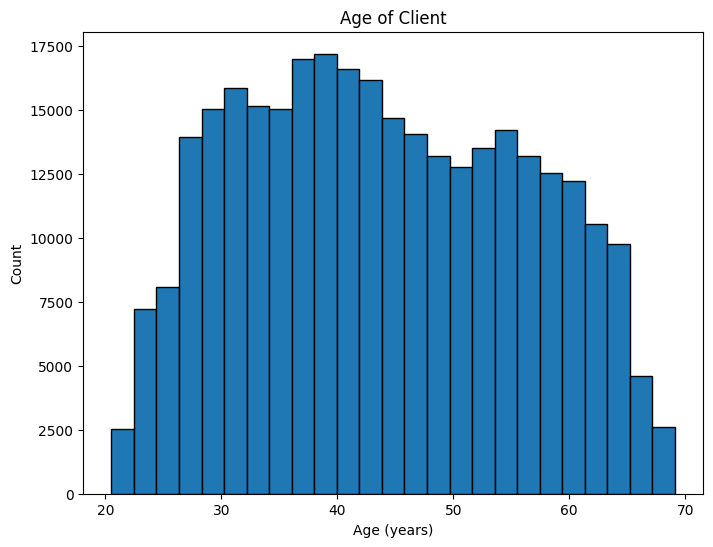

In [10]:
# Graficando la Distrbibución de Edad
plt.figure(figsize = (8, 6))
plt.hist(df_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count');

Text(0.5, 1.0, 'Age Distribution of Clients')

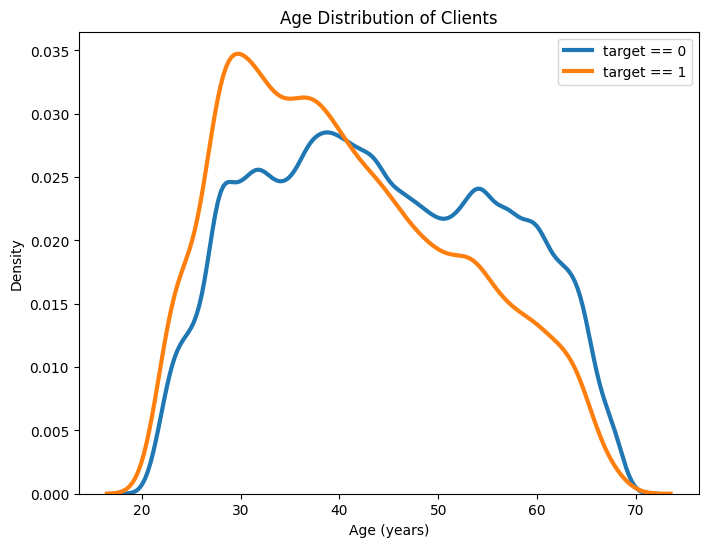

In [11]:
plt.figure(figsize = (8, 6))

# Gráfico de KDE de préstamos que se pagaron a tiempo
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0',linewidth=3)

# Gráfico de KDE de préstamos que no se pagaron a tiempo
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1',linewidth=3)

# Labeling of plot
plt.legend()
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution of Clients')

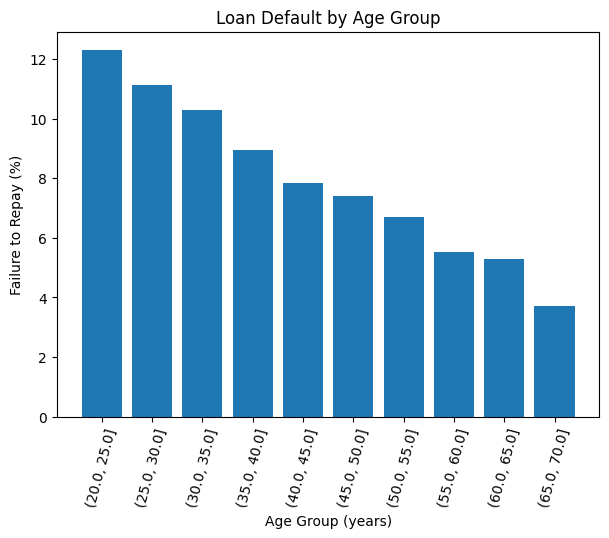

In [12]:
plt.figure(figsize= (7, 5))

# Grafique los intervalos de edad y el promedio del Target como un gráfico de barras
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Loan Default by Age Group');

Se observa que los clientes que poseen edades entre 20 y 25 años, presentan mayor porcentaje de falta de pago.

#### Days of Employment ( Dias de Empleo)
Al observar la distribución de los días empleados, hay varios valores que muestran que alguien ha trabajado durante 1000 años. Como esto no es posible, completamos las anomalías con un valor faltante, ya que todas tienen el mismo valor. Es probable que esto haya sido un error al ingresar los datos.

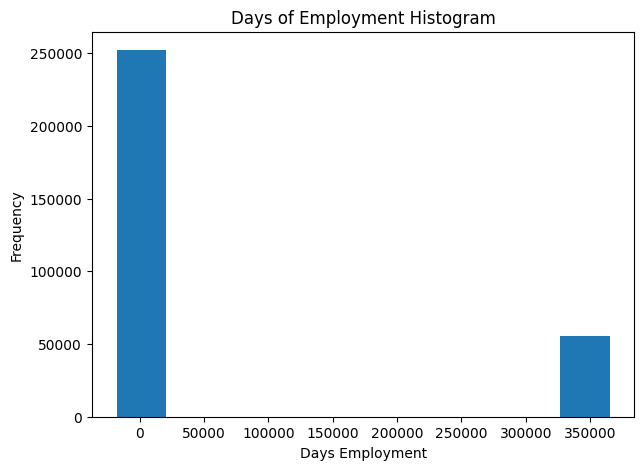

In [13]:
fig, ax = plt.subplots(figsize=(7, 5))
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days of Employment Histogram');
plt.xlabel('Days Employment');

In [14]:
anom = df_train[df_train['DAYS_EMPLOYED'] == 365243]
non_anom = df_train[df_train['DAYS_EMPLOYED'] != 365243]
print('Las no_anomalías incumplen el %0.2f%% de los préstamos' % (100 * non_anom['TARGET'].mean()))
print('Las anomalías incumplen el %0.2f%% de los préstamos' % (100 * anom['TARGET'].mean()))
print('Hay %d días de empleo anómalos' % len(anom))

Las no_anomalías incumplen el 8.66% de los préstamos
Las anomalías incumplen el 5.40% de los préstamos
Hay 55374 días de empleo anómalos


Text(0.5, 0, 'Days Employment')

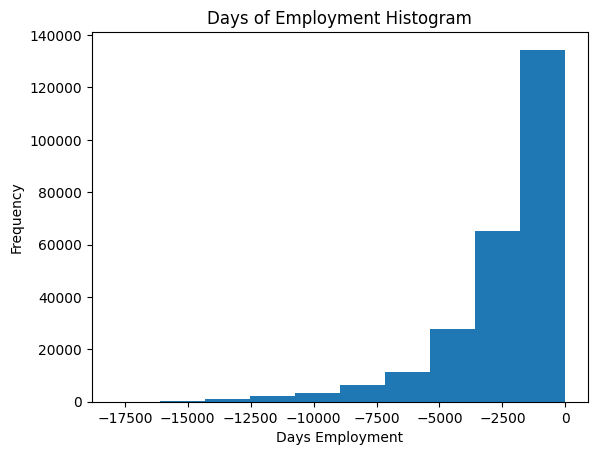

In [15]:
# Crear anomalous flag
df_train['DAYS_EMPLOYED_ANOM'] = df_train['DAYS_EMPLOYED'] == 365243

# Reemplazar valores anomalos con nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace= True)

####fig, ax = plt.subplots(figsize=(7, 5))
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days of Employment Histogram')
plt.xlabel('Days Employment')

#### Valores Perdidos

In [16]:
# Función para calcular valores perdidos por columna
def missing_values_table(df):
        # Valores perdidos totales
        mis_val = df.isnull().sum()
        
        # Porcentaje de valores faltantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Nombres de columna
        #Columns = pd.Series(df_train.columns)
        # Haz una tabla con los resultados.
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1,ignore_index= True)
        
        # Cambiar el nombre de las columnas
        mis_val_table = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Ordenar la tabla por porcentaje de faltante descendente
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Imprimir alguna información resumida
        print ("El conjunto de datos tiene " + str(df.shape[1]) + " columnas.\n"      
            "Hay " + str(mis_val_table.shape[0]) +
              " columnas que contienen valores perdidos.")
        
        # Devolver el marco de datos con información faltante
        return mis_val_table

In [17]:
mis_val_table = missing_values_table(df_train)
mis_val_table.tail(20)

El conjunto de datos tiene 123 columnas.
Hay 68 columnas que contienen valores perdidos.


,Missing Values,% of Total Values
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
DAYS_EMPLOYED,55374,18.0
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5


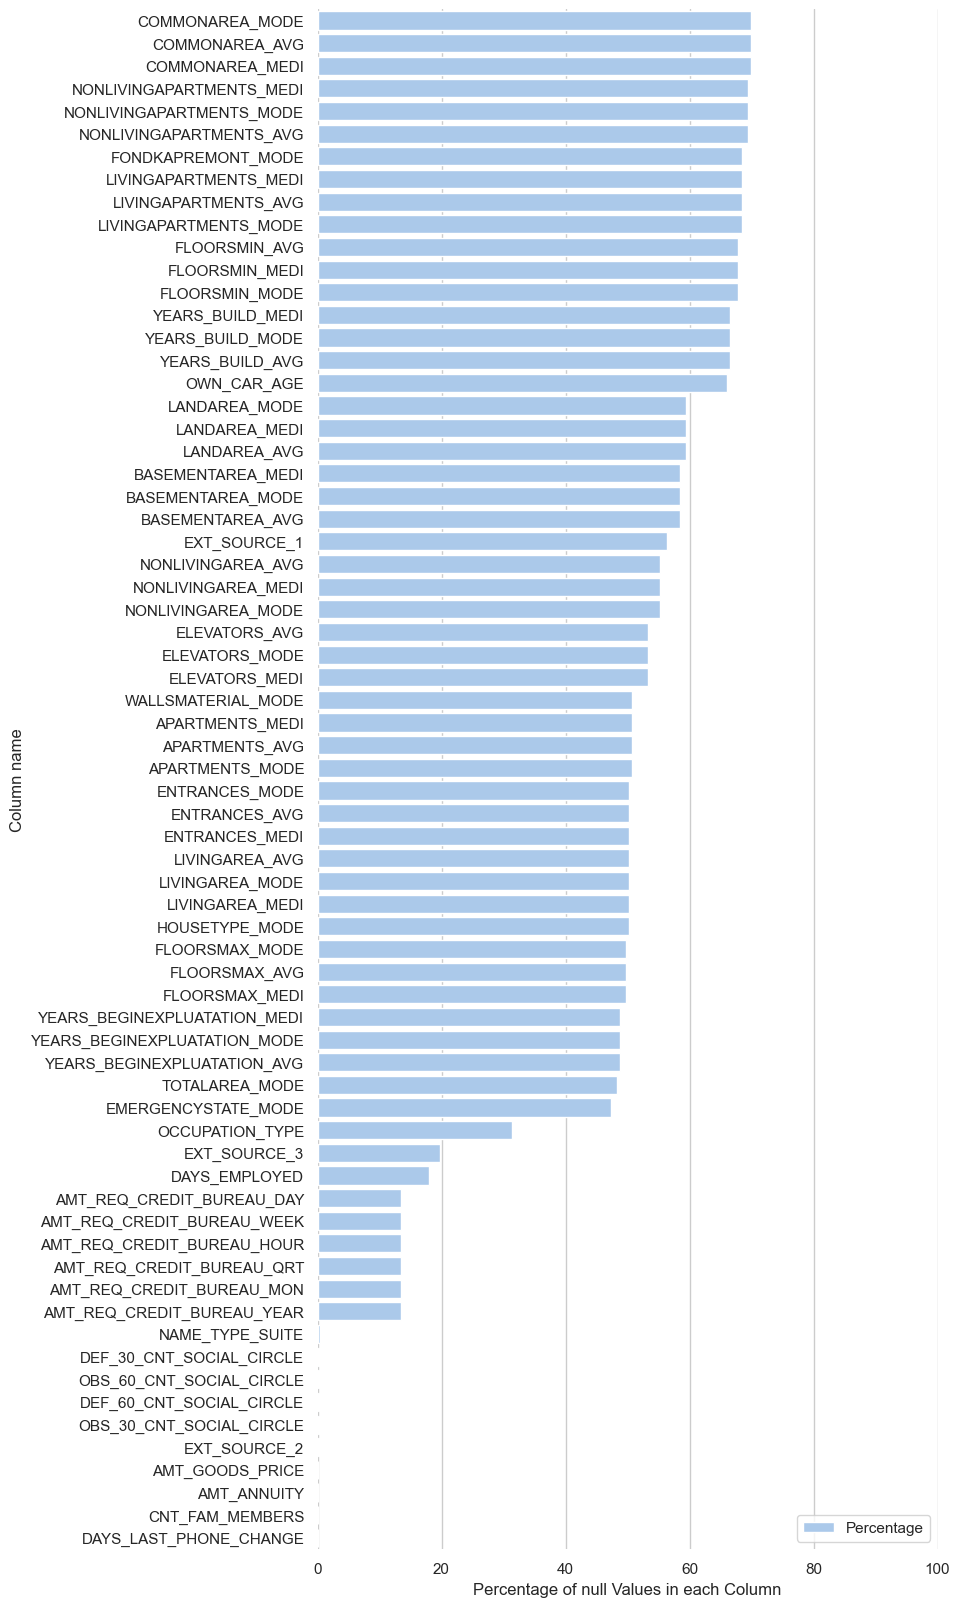

In [18]:
#### Grafico de Valores Perdidos
sns.set_theme(style="whitegrid")

# Inicializar la figura matplotlib
f, ax = plt.subplots(figsize=(8,20))


# Trazar el total
sns.set_color_codes("pastel")
sns.barplot(y=mis_val_table.index.values, x=mis_val_table['% of Total Values'].values,
            label="Percentage", color="b")


# Agregar una leyenda y una etiqueta de eje informativa
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="Column name",
       xlabel="Percentage of null Values in each Column")
sns.despine(left=True, bottom=True)

Se presentan las variables con valores perdidos y el porcentaje % de missings, más del 50% de las variables contiene almenos un dato missing.

<AxesSubplot: >

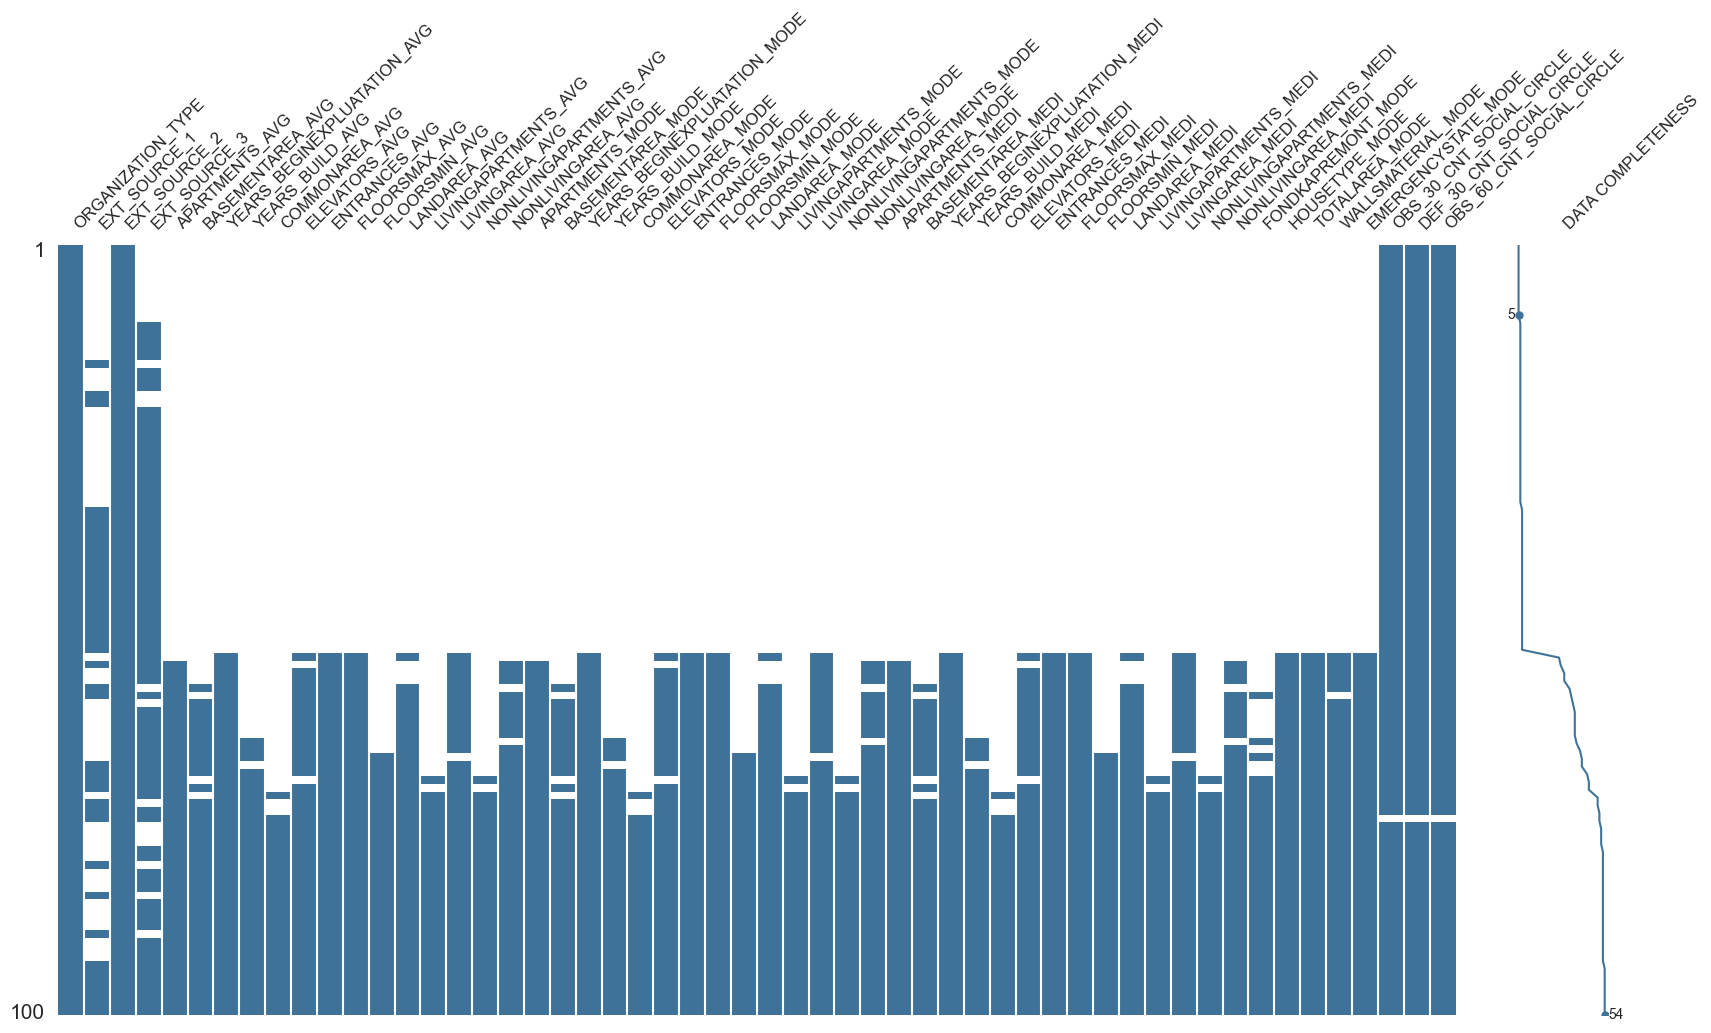

In [19]:
### Patrones de datos faltantes
import missingno as msno

msno.matrix(df_train.iloc[0:100, 40:94], sparkline=True, figsize=(20,10), 
            sort='ascending', fontsize=12, labels=True, color=(0.25, 0.45, 0.6))

Vemos que los datos que faltan son en su mayoría con la información sobre el edificio donde vive el cliente. 
Al parecer hay muchos solicitantes que dejan en blanco la información de su vivienda.

In [20]:
def feature_type_split(data):
    cat_list = []
    dis_num_list = []
    num_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            cat_list.append(i)
        elif data[i].nunique() < 25:
            dis_num_list.append(i)
        #elif i in special_list:     # if you want to add some special cases
            #dis_num_list.append(i)
        else:
            num_list.append(i)
    return cat_list, dis_num_list, num_list

cat_list, dis_num_list, num_list = feature_type_split(df_train) 

In [21]:
df_c_numeric = df_train[num_list]
df_categorical = df_train[cat_list]
df_d_numeric = df_train[dis_num_list]

print("num_list",len(num_list))
print("cat_list",len(cat_list))
print("dis_num_list",len(dis_num_list))

num_list 61
cat_list 16
dis_num_list 46


### Imputación de Datos

In [22]:
## Imputando Valores Perdidos
from sklearn.impute import SimpleImputer
import time

start = time.time()
#Categoricos
df_train[cat_list] = SimpleImputer(strategy='most_frequent').fit_transform(df_train[cat_list])

#Discretos
df_train[dis_num_list] = SimpleImputer(strategy='most_frequent').fit_transform(df_train[dis_num_list])

end = time.time()
print('discrete imputing time:', str(round((end - start)/60)), 'mins')

#Continuos 
start = time.time()
df_train[num_list] = SimpleImputer(strategy='median').fit_transform(df_train[num_list])
end = time.time()
print('continuous imputing time:', str(round((end - start)/60)), 'mins')

discrete imputing time: 0 mins
continuous imputing time: 0 mins


### Eliminación de Outliers

Probando con una Variable

In [23]:
#### Eliminando Outliers
df = df_train[num_list]

#IQR
percentile25 = df['DAYS_REGISTRATION'].quantile(0.25)
percentile75 = df['DAYS_REGISTRATION'].quantile(0.75)

IQR = percentile75 - percentile25

#Limite superior e inferior
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

#Outliers

df[df['DAYS_REGISTRATION'] > upper_limit]
df[df['DAYS_REGISTRATION'] < lower_limit]

#Trimming

new_df = df.loc[(df['DAYS_REGISTRATION'] < upper_limit) & (df['DAYS_REGISTRATION'] > lower_limit)]
new_df.shape

#Capping

new_df_cap = df_train[num_list].copy()

new_df_cap["DAYS_REGISTRATION"] = np.where(new_df_cap['DAYS_REGISTRATION'] < lower_limit,lower_limit
                                          ,np.where(new_df_cap['DAYS_REGISTRATION'] > upper_limit,upper_limit,
                                                   new_df_cap["DAYS_REGISTRATION"] )
                                          )

#Compare the plots after trimming
new_df_cap.shape

(307511, 61)

Creando función...

In [24]:
# Remove outliers
def remov_outliers(df, feature):

    #Finding the IQR
    percentile25 = df[str(feature)].quantile(0.25)
    percentile75 = df[str(feature)].quantile(0.75)

    IQR = percentile75 - percentile25

    #Finding upper and lower limit
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR

    #Finding Outliers

    df[df[feature] > upper_limit]
    df[df[feature] < lower_limit]

    #Trimming

    new_df = df.loc[(df[feature] < upper_limit) & (df[feature] > lower_limit)]
    new_df.shape

    #Capping

    new_df_cap = df.copy()

    new_df_cap[feature] = np.where(new_df_cap[feature] < lower_limit,lower_limit
                                              ,np.where(new_df_cap[feature] > upper_limit,upper_limit,
                                                       new_df_cap[feature] )
                                              )

    return new_df_cap

In [25]:
# Remove outliers for all features
df_imputed_new = df_c_numeric.copy()
# df_imputed_new = df_imputed_new.drop(columns=['SK_ID_CURR', 'TARGET'],axis = 1)

columns = df_imputed_new.columns.values

for i in columns:
    df_imputed_new = remov_outliers(df_imputed_new, i)

In [26]:
#Concat again the Dis Numerical Features
df_imputed_new = pd.concat([df_imputed_new,df_d_numeric ],axis = 1)

In [27]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df_imputed_new[num_list])
df_imputed_new[num_list] = transformer.transform(df_imputed_new[num_list])

In [28]:
df_imputed_new.shape

(307511, 107)

In [29]:
df_imputed_new.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,DAYS_EMPLOYED_ANOM
0,-1.001140,0.615,-0.198521,-0.011205,-0.224490,-0.002626,-0.865181,0.419850,0.156504,0.439705,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,False
1,-1.001135,1.365,1.448012,0.597361,1.540816,-0.820550,0.139634,0.191030,0.606637,1.148895,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,False
2,-1.001129,-0.885,-0.702740,-1.004482,-0.714286,-0.472638,0.453432,0.590947,0.044611,0.280341,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,False
3,-1.001118,-0.135,-0.372874,0.264691,-0.346939,-0.580533,0.447792,-0.577658,-0.974312,0.316789,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,False
4,-1.001112,-0.285,-0.000986,-0.168078,0.142857,0.525969,0.575320,-0.577243,0.035287,-0.079100,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,False


#### Correlación de las variables con la TARGET

In [30]:
import scipy.stats

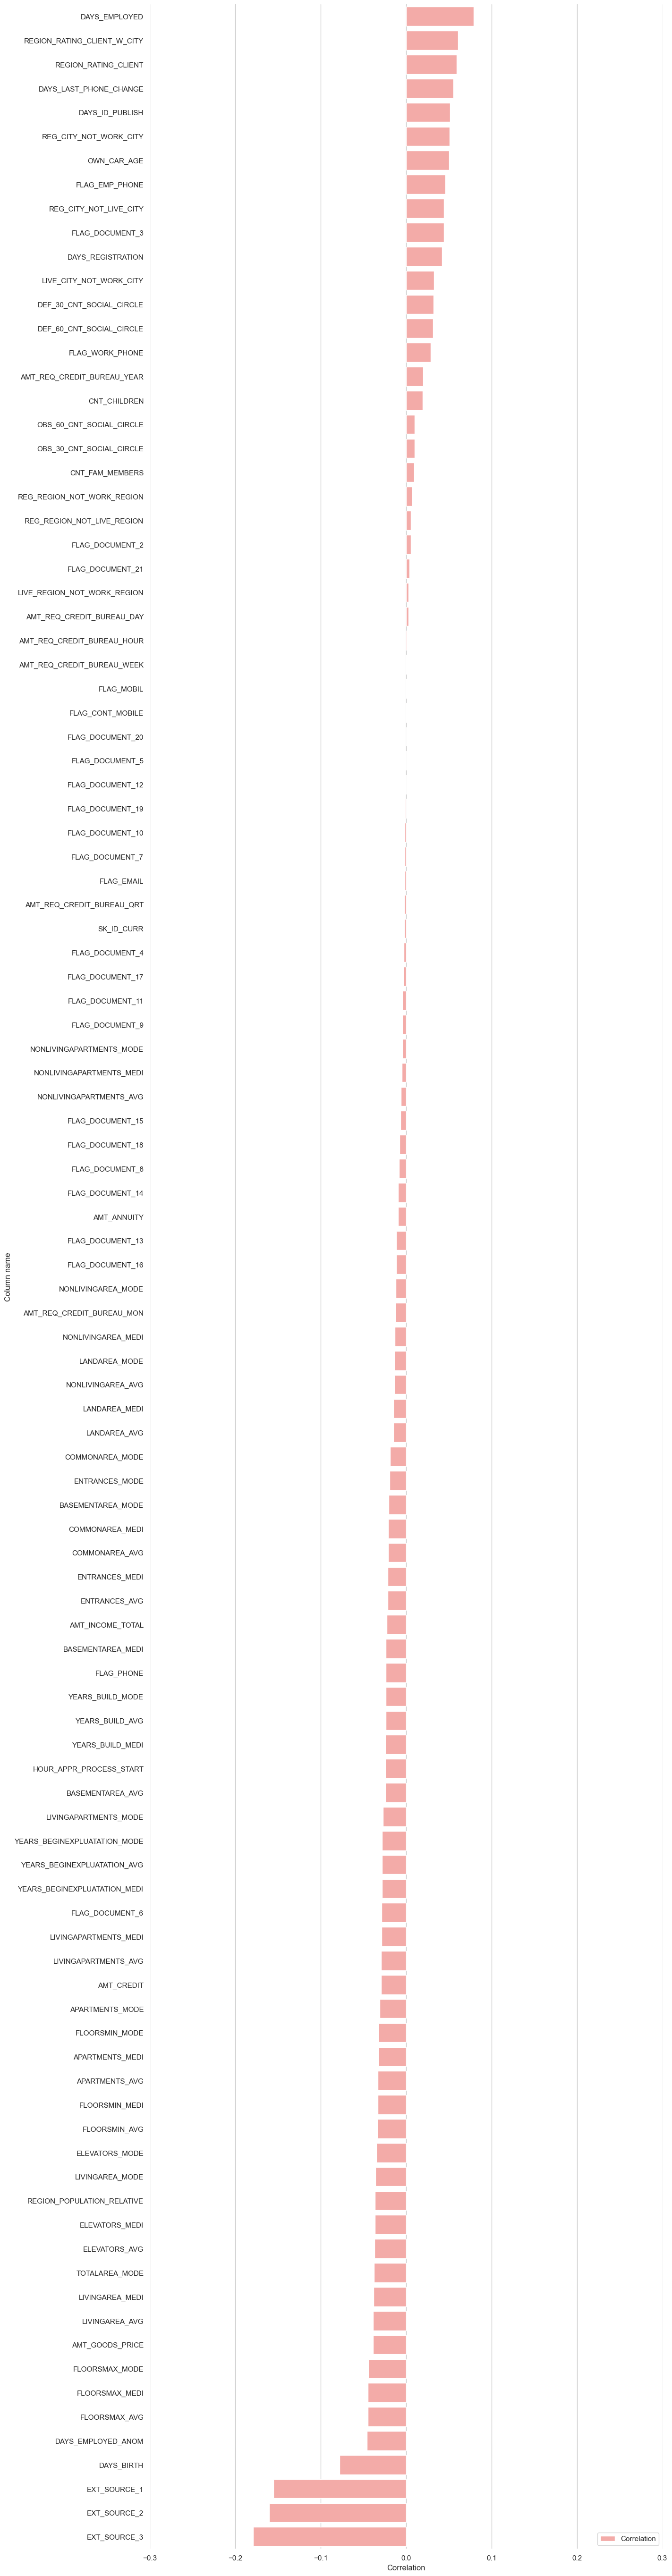

In [31]:
plt.figure(figsize=(14,70))
# sns.set_color_codes("dark")
y_corr = df_imputed_new.corr().loc["TARGET"].sort_values(ascending=False).drop("TARGET",axis = 0).dropna()

ax = sns.barplot(y=y_corr.index.values, x=y_corr.values,
            label="Correlation", color="r")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-0.3, 0.3), ylabel="Column name",
       xlabel="Correlation")
sns.despine(left=True, bottom=True)

podemos darnos cuenta de que las variables correlacionadas más importantes son ['OWN_CAR_AGE', 'DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'NONLIVINGAPARTMENTS_MODE'] & ['REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1']

#### Bureau/Bureau_Balance Datasets 

El conjunto de datos del buró contiene cuentas reportadas al buró de crédito.

Las cuentas representadas son crédito al consumo, tarjetas de crédito y alrededor de una docena de otros tipos de préstamos. Aproximadamente el 85% de los solicitantes en el conjunto de entrenamiento y prueba tenían al menos 1 cuenta en los datos de la oficina de crédito. Estos datos se agregaron para crear características que incluyen el recuento de cuentas por tipo y la suma de deudas y límites de crédito.

Los datos del saldo de la oficina contenían el estado de una cuenta individual cada mes que se remontaba a 96 meses. La gran mayoría de los valores de estado son cerrados, activos o desconocidos. Los valores de estado restantes representan cuentas vencidas que se agrupan en función de los días vencidos desde 1 a 30 días hasta más de 120 días. Se crearon funciones que tienen en cuenta la cantidad de días que una cuenta estuvo en un estado específico.

In [32]:
# Bureau Dataset
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [33]:
# Bureau_Balance Dataset
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64


<AxesSubplot: >

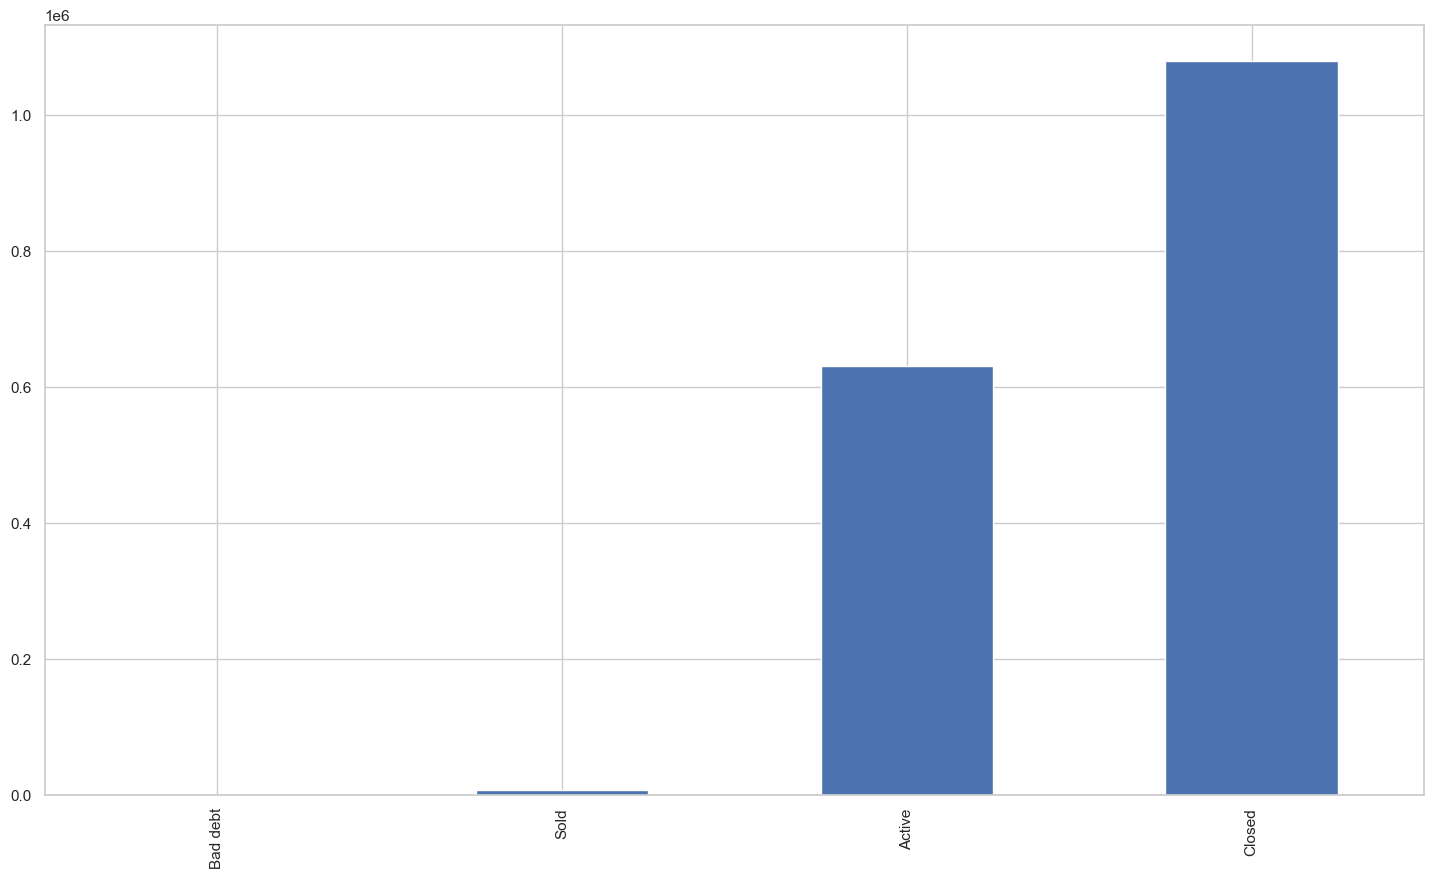

In [34]:
## Bureau Dataset

# Closed vs Active vs Sold vs Bad Debt Accounts
print(df_bureau.CREDIT_ACTIVE.value_counts())
df_bureau.CREDIT_ACTIVE.value_counts().sort_values().plot(kind = 'bar', figsize=(17.8,10))

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64


<AxesSubplot: >

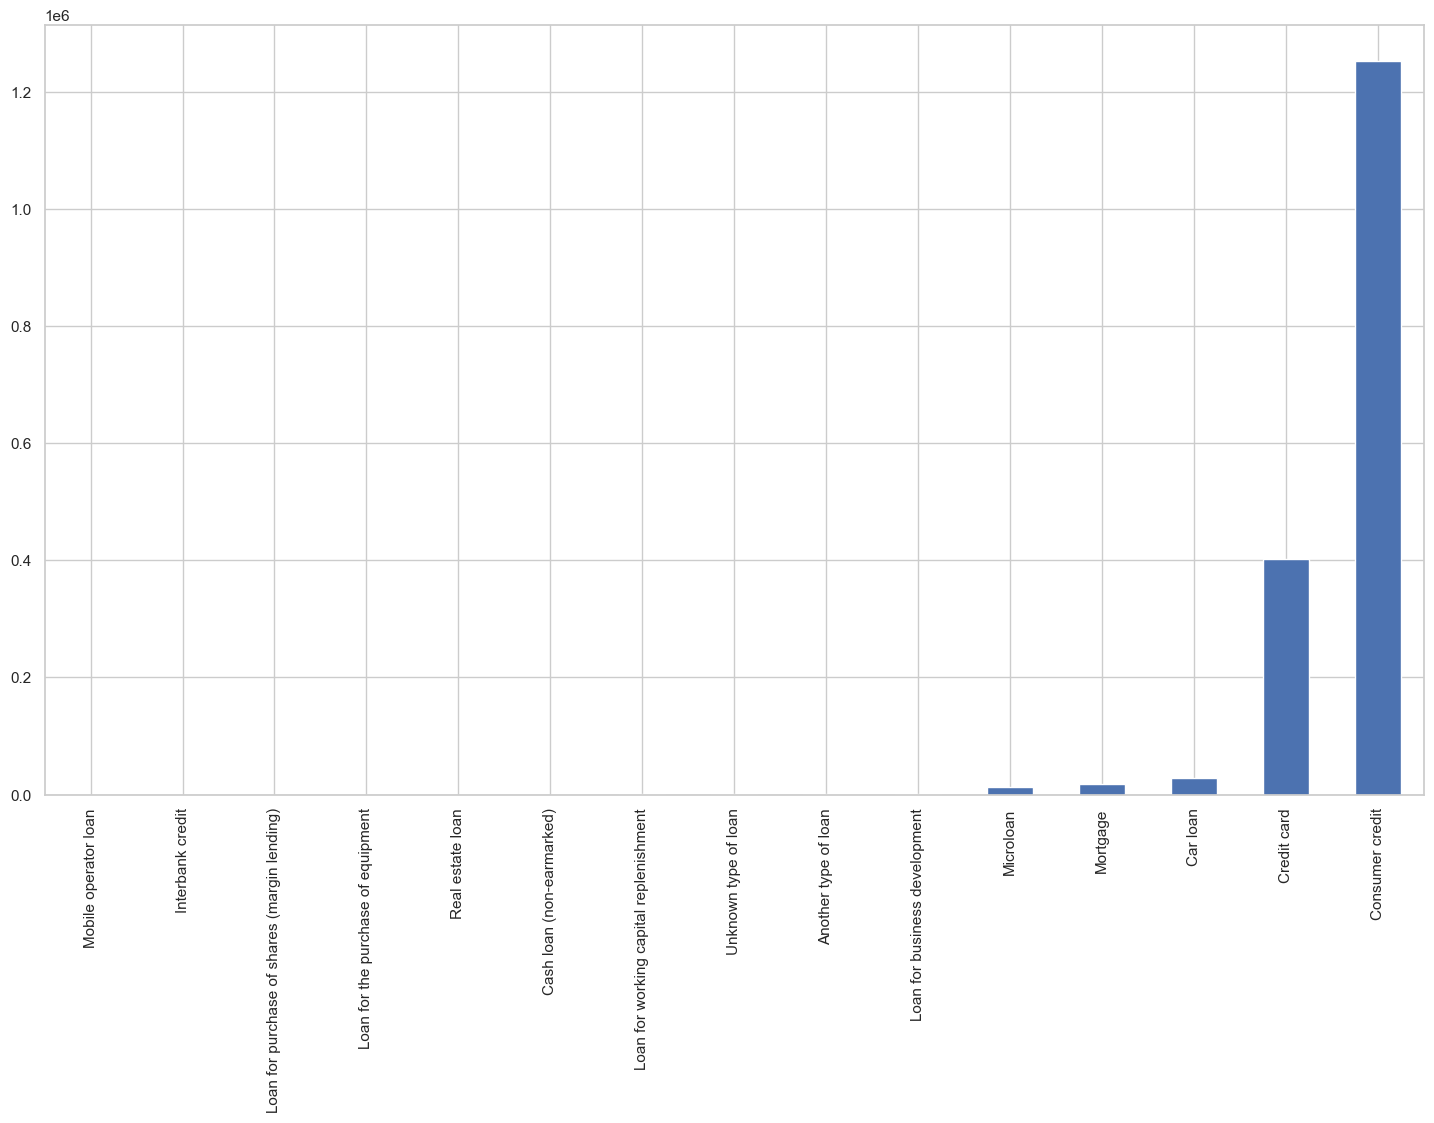

In [35]:
## Bureau Dataset

# Credit Types
print(df_bureau.CREDIT_TYPE.value_counts())
df_bureau.CREDIT_TYPE.value_counts().sort_values().plot(kind = 'bar', figsize=(17.8,10))

Podemos observar que la mayoria de prestamos otorgados son por Credito al consumidor (Credit Consumer)

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64


<AxesSubplot: >

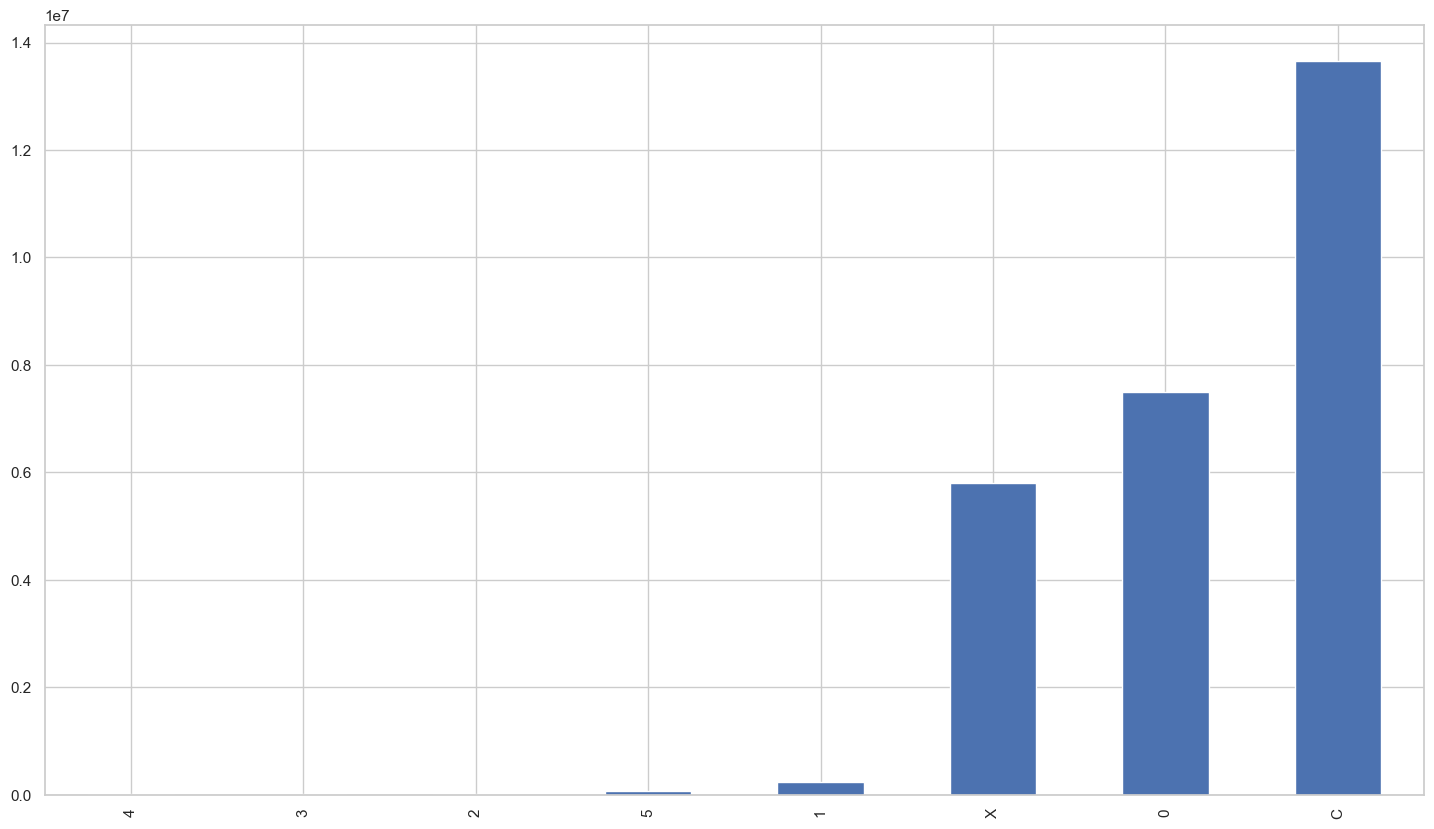

In [36]:
## Bureau_Balance Dataset

# Account Status (C=Closed, X=Unknown, 0/1/2/3/4/5=How Many Months Past Due)
print(bureau_balance.STATUS.value_counts())
bureau_balance.STATUS.value_counts().sort_values().plot(kind = 'bar', figsize=(17.8,10))

#### Regresión Logistica - Sin Feature E.

En este caso trabjaremos con la base tratada ( imputada y eliminada valores missing), del mismo train lo dividiremos en train y test,luego procederemos con con la respectiva validación del modelo

In [37]:
df_imputed_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 107 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
dtypes: bool(1), float64(69), int64(37)
memory usage: 249.0 MB


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as me
from sklearn.metrics import classification_report

In [39]:
df_imputed_new=df_imputed_new.dropna()
X = df_imputed_new.drop(["SK_ID_CURR", "TARGET"], axis = 1) 
y = df_imputed_new.TARGET

In [40]:
x_train, x_test = train_test_split(X.values, random_state=0,test_size=0.3)
y_train, y_test = train_test_split(y.values, random_state=0,test_size=0.3)

In [41]:
print(f" Dimensión de x_train = {x_train.shape}")
print(f" Dimensión de x_test = {x_test.shape}")
print(f" Dimensión de y_train = {y_train.shape}")
print(f" Dimensión de y_test = {y_test.shape}")

 Dimensión de x_train = (7522, 105)
 Dimensión de x_test = (3224, 105)
 Dimensión de y_train = (7522,)
 Dimensión de y_test = (3224,)


##### Entrenando Modelo Regresión Logistica

In [42]:
logi = LogisticRegression()
logi.fit(x_train, y_train)
logi_pred = logi.predict(x_test)
logi_confusion = me.confusion_matrix(y_test, logi_pred) 
print(logi_confusion) 
print(classification_report(y_test, logi_pred))

[[3043    0]
 [ 178    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3043
           1       1.00      0.02      0.03       181

    accuracy                           0.94      3224
   macro avg       0.97      0.51      0.50      3224
weighted avg       0.95      0.94      0.92      3224



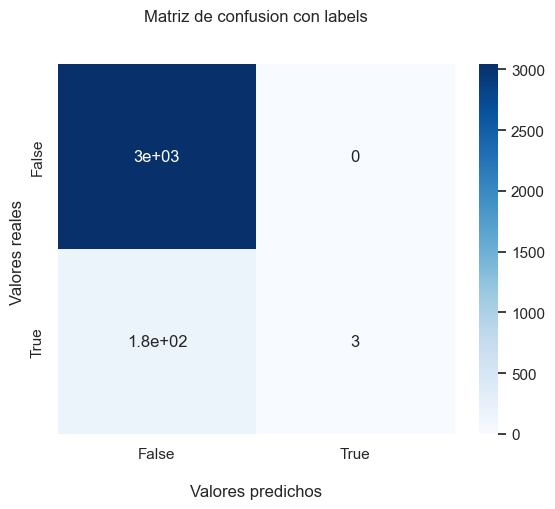

In [43]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, logi_pred)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

De la matriz, podemos observar:
 - que el 100% de las observaciones negativas son acertadas( Verdaderos negativos)
 - se cuenta con un gran numero de Falsos positivos
 
Conclusion: El modulo tiende a predecir la categeria Negativa. 

#### Desafio Complementario

,th_all,tpr_all,fpr_all
0,1.745455,0.000000,0.000000
1,0.745455,0.005525,0.000000
2,0.529271,0.016575,0.000000
3,0.495818,0.016575,0.000329
4,0.476519,0.033149,0.000329
...,...,...,...
313,0.006300,0.988950,0.937562
314,0.006280,0.994475,0.937562
315,0.004493,0.994475,0.968124
316,0.004441,1.000000,0.968124


AUC : 0.7513812154696132


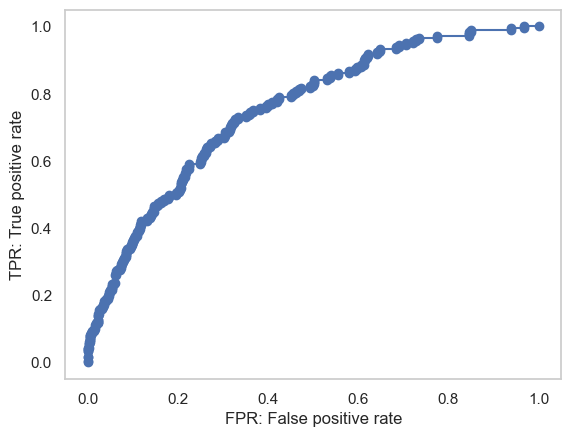

In [44]:
from sklearn.metrics import roc_auc_score
fpr_all, tpr_all, th_all  = me.roc_curve(y_test, logi.predict_proba(x_test)[:, 1], pos_label=1)# La etiqueta correcta 1 se establece en 1, por lo que debería ver la densidad de probabilidad al tomar 0
df_roc = pd.DataFrame({'th_all': th_all, 'tpr_all': tpr_all, 'fpr_all': fpr_all}) # Si el umbral, el recuerdo y el negativo se juzgan erróneamente como positivos
plt.plot(fpr_all, tpr_all, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
display(df_roc)
print('AUC : {}'.format(roc_auc_score(y_test, logi.predict_proba(x_test)[:, 1])))

Analizando el área bajo la curva podemos concluir que el modelo se ajustada adecuamente.

In [45]:
logi = LogisticRegression()
logi.fit(x_train, y_train)
logi_pred = logi.predict(x_test)
logi_confusion = me.confusion_matrix(y_test, logi_pred) 
print(logi_confusion) 
print(classification_report(y_test, logi_pred))

[[3043    0]
 [ 178    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3043
           1       1.00      0.02      0.03       181

    accuracy                           0.94      3224
   macro avg       0.97      0.51      0.50      3224
weighted avg       0.95      0.94      0.92      3224



Del resumen de metricas podemos observar que:
 - se tiene una precision global de 94%
 - sin embargo se tiene una sensibilidad del 100% para la categoria de Estudio

#### Probar otros Algoritmos

##### Librerias

In [51]:
# Import required libraries/packages

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns             
from timeit import default_timer as timer
import os
import random
import csv
import json
import itertools
import pprint
# from pydash import at
import gc
import re
# import featuretools for automated feature engineering
import featuretools as ft 
from featuretools import selection

#Import sklearn helper metrics and transformations
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

#import library for hyperparameter optimization
from hyperopt import STATUS_OK
from hyperopt import hp, tpe, Trials, fmin
from hyperopt.pyll.stochastic import sample

In [ ]:
##X_train = pd.DataFrame(x_train, columns = X.columns)
##X_test = pd.DataFrame(x_test, columns=X.columns)
##Y_train = pd.DataFrame(y_train, columns = Y.columns)
##Y_test = pd.DataFrame(y_test, columns=Y.columns)

#### Regresión Logistica

In [55]:
### Funcion para vizualizar resultados
def train_predict_visualize(x_train, y_train, x_test, y_test):
    # Regresion Logistica
    clf = LogisticRegression(random_state=123)
    clf.fit(x_train, y_train)

    # Prediciendo usando data test
    pred_Y = clf.predict(x_test)
    pred_prob_Y = clf.predict_proba(x_test)[:, 1]

    # Metricas
    auc = roc_auc_score(y_test, pred_prob_Y)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_Y).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)

    # Print metricas
    print('AUC:', auc)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1_score)

    # Visualizando feature importances
    coef = pd.Series(clf.coef_[0], index=X.columns)
    coef.nlargest(10).plot(kind='barh')
    plt.show()

In [58]:
#### Visualizando 

def train_predict_visualize(x_train, y_train, x_test, y_test):
    # Regresion Logistica
    clf = LogisticRegression(random_state=123)
    clf.fit(x_train, y_train)

    # Prediciendo usando data test
    pred_Y = clf.predict(x_test)
    pred_prob_Y = clf.predict_proba(x_test)[:, 1]

    # Metricas
    auc = roc_auc_score(y_test, pred_prob_Y)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_Y).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)

    # Print metricas
    print('AUC:', auc)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1_score)

    # Visualizando feature importances
    coef = pd.Series(clf.coef_[0], index=X.columns)
    top_features = coef.nlargest(10)
    top_features.plot(kind='barh')
    plt.show()

    # Print top 10 features
    print('Top 10 Features:')
    print(top_features.to_string())

AUC: 0.7513812154696132
Accuracy: 0.9447890818858561
Precision: 1.0
Recall: 0.016574585635359115
F1 Score: 0.03260869565217391


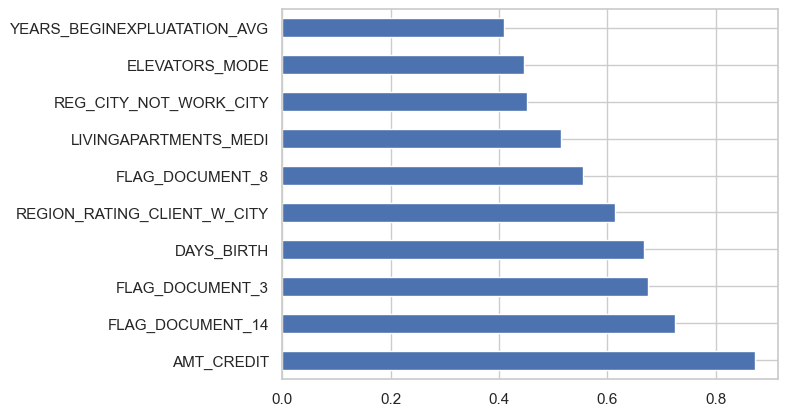

Top 10 Features:
AMT_CREDIT                     0.871615
FLAG_DOCUMENT_14               0.725457
FLAG_DOCUMENT_3                0.675071
DAYS_BIRTH                     0.666668
REGION_RATING_CLIENT_W_CITY    0.613033
FLAG_DOCUMENT_8                0.555549
LIVINGAPARTMENTS_MEDI          0.514579
REG_CITY_NOT_WORK_CITY         0.452260
ELEVATORS_MODE                 0.445906
YEARS_BEGINEXPLUATATION_AVG    0.409177


In [59]:
### Visulizando
train_predict_visualize(x_train, y_train, x_test,y_test)

#### XGBoost

In [61]:
import xgboost as xgb

In [69]:
# Train XGBClassifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

# feature importances
importances = xgb_model.get_booster().get_score(importance_type='gain')
importances = {feature: importance for feature, importance in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

# dataframe feature importances
feature_importances = pd.DataFrame({'feature': list(importances.keys()), 'importance': list(importances.values())})

# top 10 features
top_features = feature_importances.head(10)

# predictions test set
y_pred_prob = xgb_model.predict_proba(x_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluando performance del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC score:', auc)

# predictions test set
test_pred_prob = xgb_model.predict_proba(x_test)[:, 1]
test_pred = (test_pred_prob > 0.5).astype(int)

#x_test['SK_ID_CURR'] = X.loc[X.index, 'SK_ID_CURR']

Accuracy: 0.9441687344913151
Precision: 0.5454545454545454
Recall: 0.03314917127071823
F1 score: 0.0625
AUC score: 0.706661244083423


Se obtuvo una precisión de 94% con Xg_Boost, sin embargo la precisión es de 50%

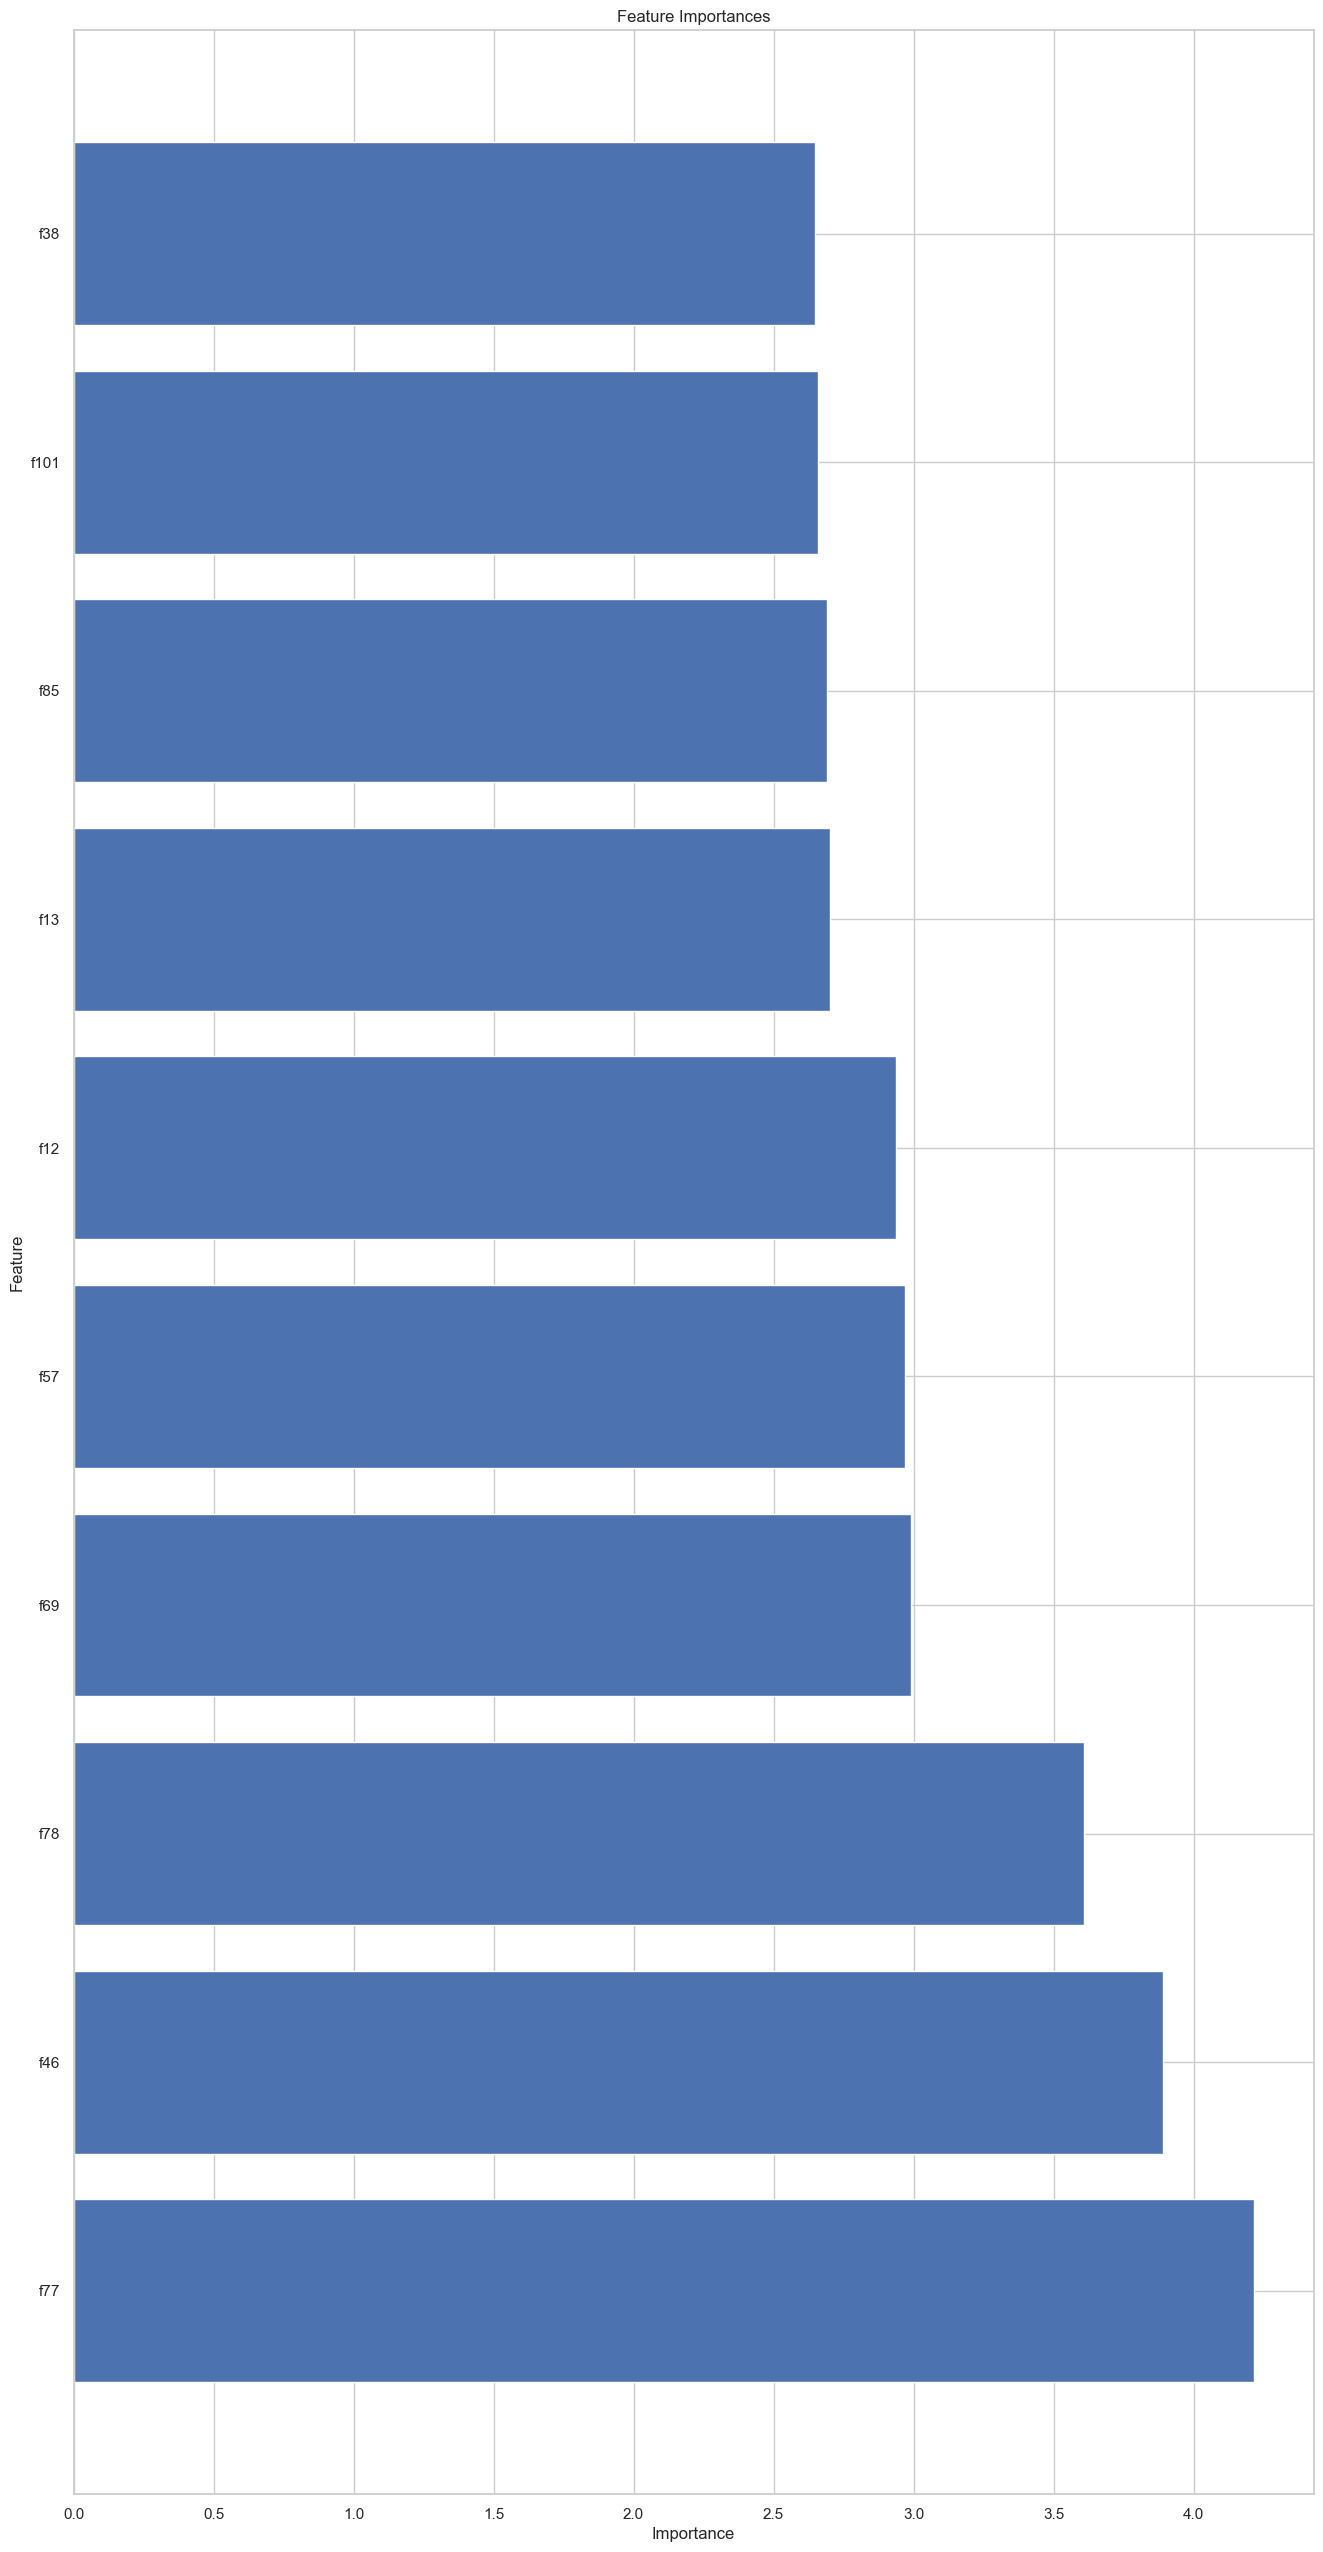

In [67]:
# Plot the feature importances
plt.figure(figsize=(16, 32))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

### LightGBM

In [70]:
# Train a LightGBM classifier
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(x_train, y_train)

# Get the feature importances
importances = lgb_model.feature_importances_

# Create a dataframe with the feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Select the top 10 features
top_features = feature_importances.head(10)

# Print the top 10 features
print(top_features)

# Make predictions on the test set
y_pred_prob = lgb_model.predict_proba(x_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the performance of the model
accuracy_lgbm = accuracy_score(y_test, y_pred)
precision_lgbm = precision_score(y_test, y_pred)
recall_lgbm = recall_score(y_test, y_pred)
f1_lgbm = f1_score(y_test, y_pred)
auc_lgbm = roc_auc_score(y_test, y_pred_prob)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC score:', auc)

# Make predictions on the test data
test_pred_prob = lgb_model.predict_proba(x_test)[:, 1]
test_pred = (test_pred_prob > 0.5).astype(int)


                       feature  importance
12                EXT_SOURCE_3         173
8              DAYS_ID_PUBLISH         164
10                EXT_SOURCE_1         161
11                EXT_SOURCE_2         151
58      DAYS_LAST_PHONE_CHANGE         135
6                DAYS_EMPLOYED         122
7            DAYS_REGISTRATION         119
5                   DAYS_BIRTH         112
2                  AMT_ANNUITY          98
4   REGION_POPULATION_RELATIVE          95
Accuracy: 0.9441687344913151
Precision: 0.5454545454545454
Recall: 0.03314917127071823
F1 score: 0.0625
AUC score: 0.706661244083423


Se obtuvo una precisión de 94% con LightGBM, sin embargo la precisión es de 50%

##### Comparando XGboost y LightGBM

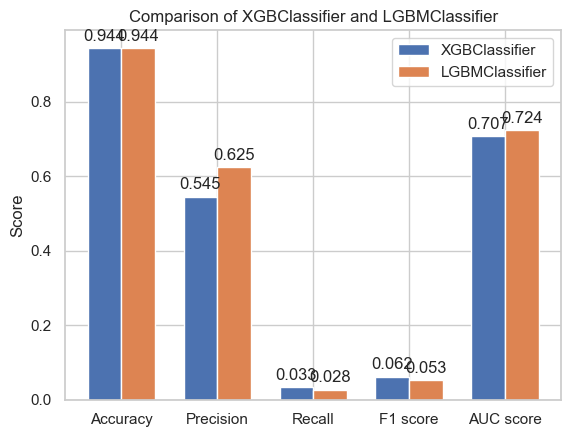

            Model  Accuracy  Precision    Recall  F1 Score  AUC Score
0   XGBClassifier  0.944169   0.545455  0.033149   0.06250   0.706661
1  LGBMClassifier  0.944479   0.625000  0.027624   0.05291   0.723860


In [71]:
# Define the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC score']
xgb_scores = [accuracy, precision, recall, f1, auc]
lgbm_scores = [accuracy_lgbm, precision_lgbm, recall_lgbm, f1_lgbm, auc_lgbm]

# Create a bar plot
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xgb_scores, width, label='XGBClassifier')
rects2 = ax.bar(x + width/2, lgbm_scores, width, label='LGBMClassifier')

# Add labels and title
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_title('Comparison of XGBClassifier and LGBMClassifier')

# Add values above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

plt.show()

# Create a dictionary to store the scores
scores_dict = {'Model': ['XGBClassifier', 'LGBMClassifier'],
               'Accuracy': [xgb_scores[0], lgbm_scores[0]],
               'Precision': [xgb_scores[1], lgbm_scores[1]],
               'Recall': [xgb_scores[2], lgbm_scores[2]],
               'F1 Score': [xgb_scores[3], lgbm_scores[3]],
               'AUC Score': [xgb_scores[4], lgbm_scores[4]]}

# Create a pandas dataframe from the dictionary
scores_df = pd.DataFrame(scores_dict)

# Print the dataframe
print(scores_df)

De los algoritmos evaluados, podemos observar que el LightGBM tiene mejor Accuracy, Precision y AUC por lo cual seria el Mejor Algortimo a elegir